In [1]:

import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# # Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# # Verify the path
print(f"Added to sys.path: {parent_dir}")

# # Add it to sys.path
sys.path.append(parent_dir)

print(sys.path)
# print(parent_dir)
# import torch
from localityaware.module import MLP
from NSGA_nn.nsga import *

Added to sys.path: /Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen
['/Users/Amy/opt/anaconda3/envs/Aspen/lib/python313.zip', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/lib-dynload', '', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/site-packages', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen']
['/Users/Amy/opt/anaconda3/envs/Aspen/lib/python313.zip', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/lib-dynload', '', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/site-packages', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen']


In [2]:
import pickle
import torch

run_id = 'vinyl/run_2025-04-17_16-07-59'


# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 0


In [15]:
run_id = 'vinyl/run_2025-04-17_16-07-59' 

# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 0


In [35]:
# population inputs over iterations
print(populations)

[array([[-0.59034473, -0.33667436, -0.77731728, ...,  0.43698937,
         0.99206071,  0.89955753],
       [-0.80102109,  0.63779539, -0.05656998, ...,  0.68027694,
         0.73051882,  0.32404833],
       [-0.9817518 , -0.88772171, -0.10153163, ...,  0.84701047,
         0.28956084,  0.99540246],
       ...,
       [-0.48933408,  0.01675292,  0.53785523, ..., -0.07908291,
        -0.22486915,  0.45251598],
       [-0.65076768, -0.73232864,  0.89486205, ...,  0.80415618,
         0.93470824, -0.3908146 ],
       [-0.1324152 , -0.28315907,  0.17723056, ...,  0.18246023,
        -0.10138403,  0.44625621]], shape=(1000, 8)), array([[ 0.92275318, -0.9797948 , -0.65255692, ..., -0.0142926 ,
        -0.84803444,  0.8469791 ],
       [ 0.7340799 , -0.71805793,  0.99195462, ...,  0.57988055,
        -0.95313905,  0.3511778 ],
       [ 0.76664514, -0.97397786, -0.91778117, ..., -0.07743529,
        -0.80798978,  0.40178303],
       ...,
       [-0.31914984,  0.07179567, -0.06401293, ..., -0.3

In [17]:
# pareto inputs and outputs over iterations
print(iteration_log)

[{'iteration': 0, 'time_sec': 18.39134979248047, 'assSim_calls': 22, 'x': array([[30.137636  , 28.770144  ,  0.14022155,  0.47017843, 36.75543   ,
        32.94257   ,  1.4975355 ,  0.9098462 ],
       [30.216375  , 28.9329    ,  0.11790816,  0.47217602, 35.518448  ,
        33.40766   ,  1.4863812 ,  0.909341  ]], dtype=float32), 'y': [(0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252)]}, {'iteration': 1, 'time_sec': 13.10393476486206, 'assSim_calls': 46, 'x': array([[35.842564  , 28.32255   ,  1.2121614 ,  0.47931617, 35.253258  ,
        11.575375  ,  0.10774597,  0.9075387 ],
       [31.497423  ,  2.3032758 ,  0.15679428,  0.4616586 , 41.642323  ,
        31.804699  ,  0.12575927,  0.90719545],
       [34.417496  ,  2.5159764 ,  0.11121546,  0.460005  , 41.892204  ,
        33.332348  ,  0.15700422,  0.90244174],
       [31.539257  ,  2.1746569 ,  0.1573741 ,  0.4614149 , 41.862595  ,
        33.434

In [38]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 110.2 kB/s eta 0:00:0000:030:05m
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


[[30.269093   28.544767    0.2414495   0.46022633 35.222935   19.267227
   1.3607348   0.8901767 ]] [[3.82628931e-02 9.99872105e-01 2.79607476e+05 5.93528772e+03]]


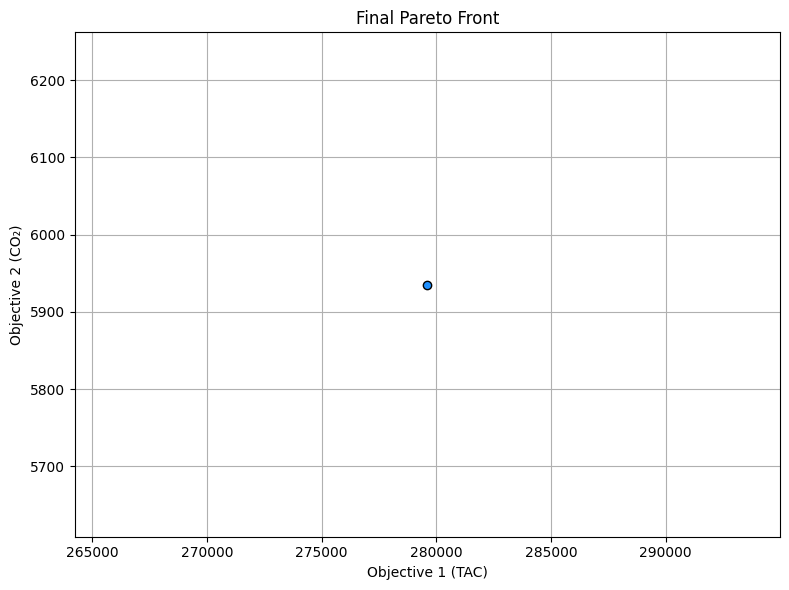

In [45]:
# FINAL PARETO FRONT (TAC VS. CO2) EVERY ITERATION
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns


iteration_log = out['iteration_log']
populations = out['populations']

# Final iteration's objectives and inputs
final_y = np.array(iteration_log[-1]['y'])
final_x = np.array(iteration_log[-1]['x'])

print(final_x, final_y)
# 1. Final Pareto front plot (objective values)
plt.figure(figsize=(8, 6))
plt.scatter(final_y[:, 2], final_y[:, 3], c='dodgerblue', edgecolors='k')
plt.xlabel('Objective 1 (TAC)')
plt.ylabel('Objective 2 (CO₂)')
plt.title('Final Pareto Front')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# PARETO FRONT (TAC VS. CO2) EVERY ITERATION
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# Setup figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter([], [], c='red')
ax.set_xlim(260000, 300000)  # adjust based on your data
ax.set_ylim(5500, 6500)      # adjust based on your data
ax.set_xlabel("Objective 1 (TAC)")
ax.set_ylabel("Objective 2 (CO₂)")
ax.set_title("Pareto Front Over Iterations")

print(iteration_log)
# Animation update function
def update(frame):
    y_vals = np.array(iteration_log[frame]["y"])
    
    if y_vals.ndim == 1:  # only one point
        y_vals = y_vals.reshape(1, -1)
    if y_vals.shape[1] < 4:
        print(f"Skipping frame {frame}: Not enough objective columns.")
        return sc,
    obj1 = y_vals[:, 2]  # TAC
    obj2 = y_vals[:, 3]  # CO2
    points = np.column_stack((obj1, obj2))
    sc.set_offsets(points)
    ax.set_title(f"Pareto Front – Iteration {frame}")
    return sc,

# Create animation
ani = FuncAnimation(fig, update, frames=len(iteration_log), repeat=False)
plt.close()
HTML(ani.to_jshtml())


[{'iteration': 0, 'time_sec': 18.39134979248047, 'assSim_calls': 22, 'x': array([[30.137636  , 28.770144  ,  0.14022155,  0.47017843, 36.75543   ,
        32.94257   ,  1.4975355 ,  0.9098462 ],
       [30.216375  , 28.9329    ,  0.11790816,  0.47217602, 35.518448  ,
        33.40766   ,  1.4863812 ,  0.909341  ]], dtype=float32), 'y': [(0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252)]}, {'iteration': 1, 'time_sec': 13.10393476486206, 'assSim_calls': 46, 'x': array([[35.842564  , 28.32255   ,  1.2121614 ,  0.47931617, 35.253258  ,
        11.575375  ,  0.10774597,  0.9075387 ],
       [31.497423  ,  2.3032758 ,  0.15679428,  0.4616586 , 41.642323  ,
        31.804699  ,  0.12575927,  0.90719545],
       [34.417496  ,  2.5159764 ,  0.11121546,  0.460005  , 41.892204  ,
        33.332348  ,  0.15700422,  0.90244174],
       [31.539257  ,  2.1746569 ,  0.1573741 ,  0.4614149 , 41.862595  ,
        33.434

[[(0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252)], [(0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252), (0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252)], array([], dtype=float64), array([], dtype=float64), [(0.0382628931, 0.999872105, 279607.47557696677, 5935.287721444252)]]


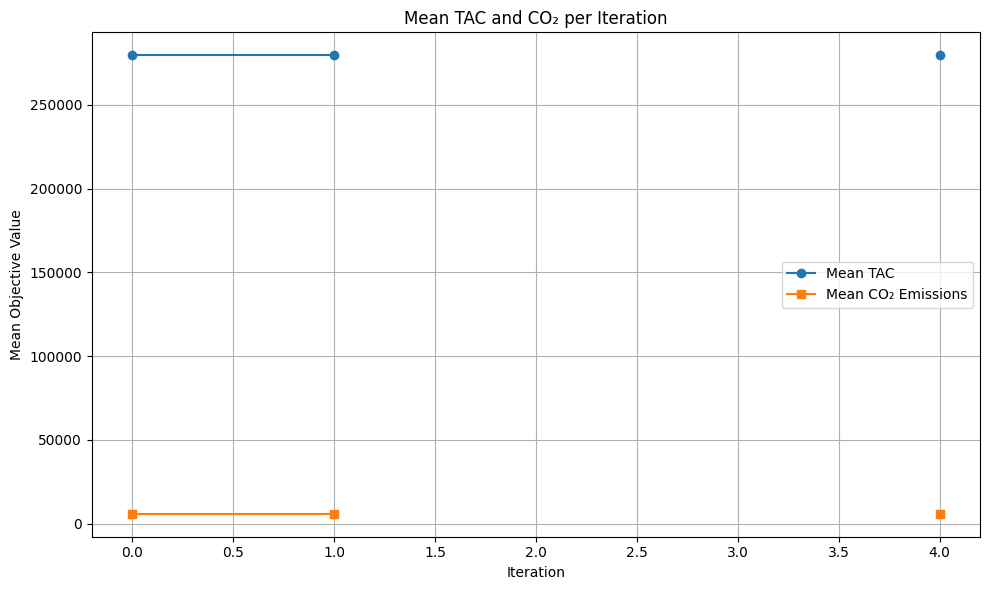

In [103]:
# MEAN OBJECTIVE VALUES OVER TIME
mean_obj1 = []
mean_obj2 = []

for y in y_path:
    y = np.array(y)
    if y.ndim == 2 and y.shape[1] >= 4 and len(y) > 0:
        mean_obj1.append(np.mean(y[:, 2]))
        mean_obj2.append(np.mean(y[:, 3]))
    else:
        mean_obj1.append(np.nan)
        mean_obj2.append(np.nan)

print(y_path)
plt.figure(figsize=(10, 6))
plt.plot(mean_obj1, label='Mean TAC', marker='o')
plt.plot(mean_obj2, label='Mean CO₂ Emissions', marker='s')
plt.xlabel("Iteration")
plt.ylabel("Mean Objective Value")
plt.title("Mean TAC and CO₂ per Iteration")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


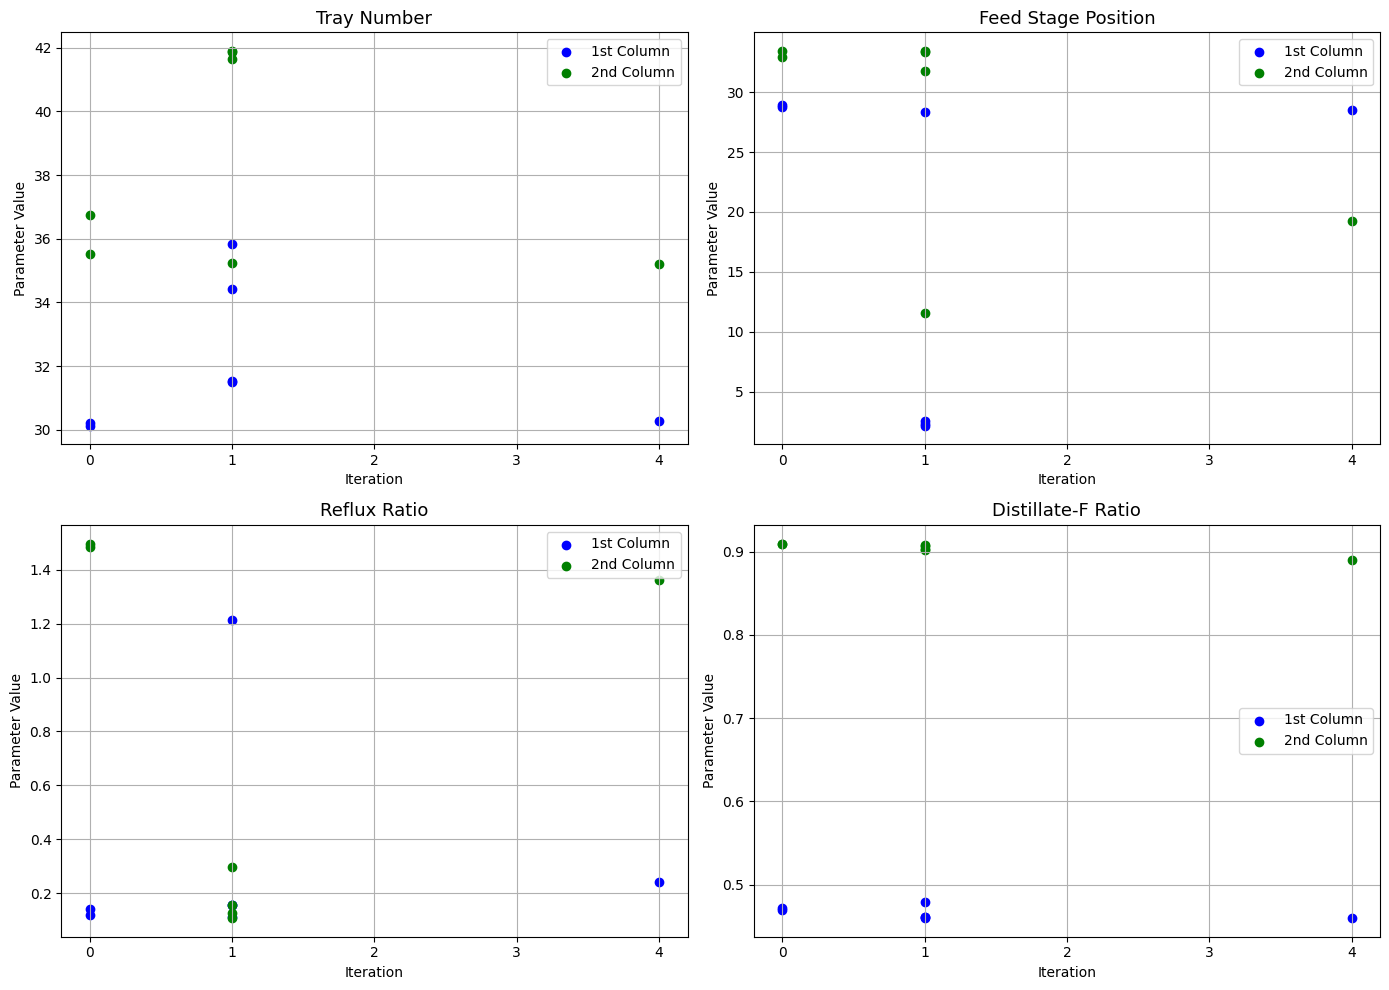

In [97]:
# PARAMETER EVOLUTION OF BOTH COLUMNS OVER ITERATIONS 
import matplotlib.pyplot as plt
import numpy as np

# Each tuple: (index1, index2, title, label1, label2)
param_settings = [
    (0, 4, "Tray Number", "1st Column", "2nd Column"),
    (1, 5, "Feed Stage Position", "1st Column", "2nd Column"),
    (2, 6, "Reflux Ratio", "1st Column", "2nd Column"),
    (3, 7, "Distillate-F Ratio", "1st Column", "2nd Column")
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (param1, param2, title, label1, label2) in enumerate(param_settings):
    iters = []
    values1 = []
    values2 = []

    for i, x in enumerate(x_path):
        if len(x) == 0:
            continue
        for row in x:
            iters.append(i)
            values1.append(row[param1])
            values2.append(row[param2])

    ax = axes[idx]
    ax.scatter(iters, values1, label=label1, color='blue')
    ax.scatter(iters, values2, label=label2, color='green')
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Parameter Value')
    ax.set_xticks(range(len(x_path)))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


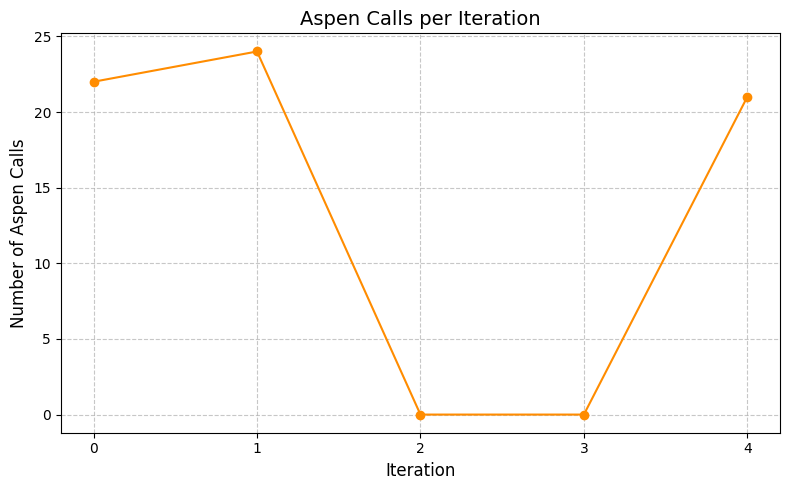

In [99]:
# ITERATION VS. TOTAL # OF ASPEN CALLS
calls_per_it = [iteration_log[0]["assSim_calls"]] + \
               [iteration_log[i]["assSim_calls"] - iteration_log[i-1]["assSim_calls"]
                for i in range(1, len(iteration_log))]

plt.figure(figsize=(8, 5))
plt.plot(range(len(calls_per_it)), calls_per_it, marker='o', color='darkorange')
plt.title("Aspen Calls per Iteration", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Number of Aspen Calls", fontsize=12)
plt.xticks(ticks=range(len(calls_per_it)))
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

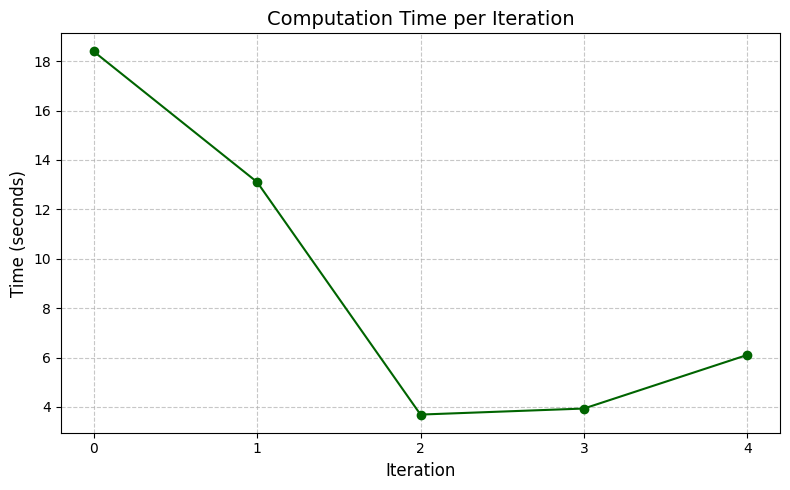

In [119]:
# ITERATION VS. TIME
time_per_it = [entry["time_sec"] for entry in iteration_log]

plt.figure(figsize=(8, 5))
plt.plot(range(len(time_per_it)), time_per_it, marker='o', color='darkgreen')
plt.title("Computation Time per Iteration", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(ticks=range(len(time_per_it)))
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [117]:
# PCA OF POPULATIONS OVER ITERATIONS (FIXED TRANSFORMATION BASED ON INITIAL TRANSFORMATION)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Step 1: Fit PCA on initial population
initial_pop = populations[0]  # shape (pop_size, 8)
pca = PCA(n_components=2)
pca.fit(initial_pop)

# Step 2: Project all populations
projected_points = []
valid_iters = []

for i, x in enumerate(populations):
    if len(x) == 0:
        continue
    reduced = pca.transform(x)
    projected_points.append(reduced)
    valid_iters.append(i)

# Step 3: Create animation
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter([], [], s=10, alpha=0.7)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
title = ax.set_title("")

def update(frame):
    points = projected_points[frame]
    sc.set_offsets(points)
    title.set_text(f"PCA Projection – Iteration {valid_iters[frame]}")
    return sc, title

ani = FuncAnimation(fig, update, frames=len(projected_points), repeat=False)
plt.close()

# Display in Jupyter
HTML(ani.to_jshtml())
